In [5]:
# Install necessary libraries (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn statsmodels plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import datetime


In [6]:
# Generate a sample traffic dataset (1 week of hourly data)
date_rng = pd.date_range(start='2025-05-01', end='2025-05-07', freq='H')

# Simulate random traffic volume between 50 and 500 vehicles
np.random.seed(42)
traffic_volume = np.random.randint(50, 500, size=(len(date_rng),))

# Create the dataframe
traffic_data = pd.DataFrame(date_rng, columns=['timestamp'])
traffic_data['traffic_volume'] = traffic_volume

# Display the first few rows
traffic_data.head()


C:\Users\priya\AppData\Local\Temp\ipykernel_8772\2886081311.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2025-05-01', end='2025-05-07', freq='H')


,timestamp,traffic_volume
0,2025-05-01 00:00:00,152
1,2025-05-01 01:00:00,485
2,2025-05-01 02:00:00,398
3,2025-05-01 03:00:00,320
4,2025-05-01 04:00:00,156


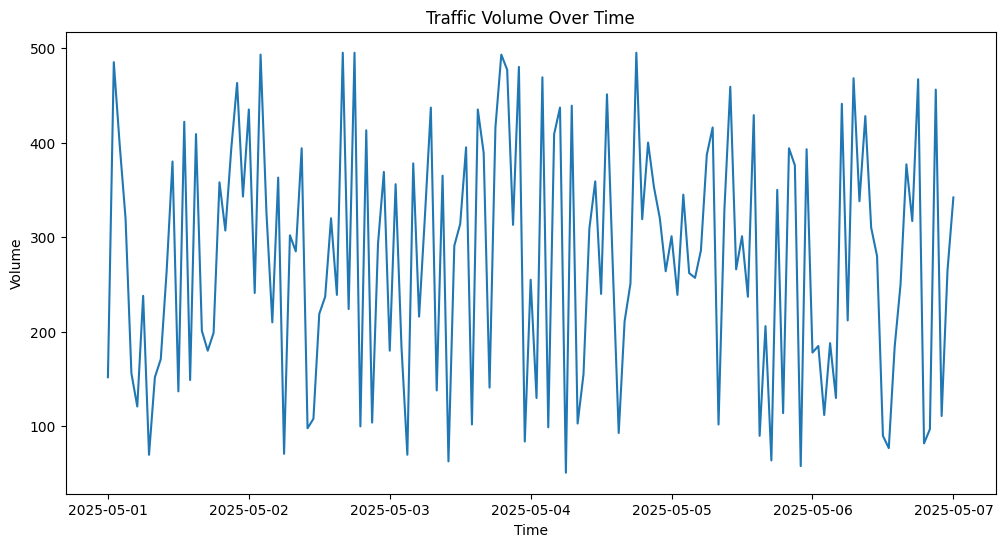

In [7]:
# Convert timestamp to datetime (if needed)
traffic_data['timestamp'] = pd.to_datetime(traffic_data['timestamp'])
traffic_data.set_index('timestamp', inplace=True)

# Visualize traffic flow
plt.figure(figsize=(12,6))
plt.plot(traffic_data['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\priya\AppData\Local\Temp\ipykernel_8772\77767929.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(traffic_data.index[-1], periods=25, freq='H')[1:], forecast, label='Forecast', linestyle='--')


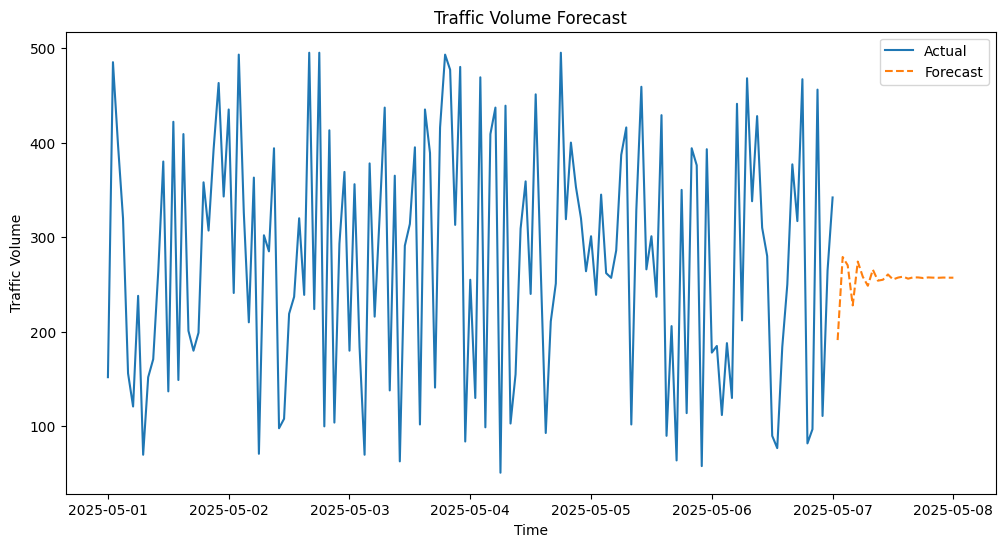

In [8]:
# Fit an ARIMA model (order = p,d,q)
# p: number of lag observations in the model (autoregressive order)
# d: number of times that the raw observations are differenced
# q: size of the moving average window
model = ARIMA(traffic_data['traffic_volume'], order=(5,1,0))  # Using (5,1,0) as an example
model_fit = model.fit()

# Forecast the next 24 hours (for example)
forecast = model_fit.forecast(steps=24)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(traffic_data.index, traffic_data['traffic_volume'], label='Actual')
plt.plot(pd.date_range(traffic_data.index[-1], periods=25, freq='H')[1:], forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Traffic Volume Forecast')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.show()


In [9]:
# Simulating real-time traffic data updates (placeholder for actual IoT integration)
import time

print("Simulating real-time traffic data updates...\n")
for i in range(5):  # Simulate 5 new data points
    new_data = np.random.randint(50, 500)  # Simulated traffic volume
    print(f"New traffic data point at {datetime.datetime.now()}: Volume = {new_data}")
    time.sleep(1)


Simulating real-time traffic data updates...

New traffic data point at 2025-05-01 16:33:08.067758: Volume = 148
New traffic data point at 2025-05-01 16:33:09.068518: Volume = 221
New traffic data point at 2025-05-01 16:33:10.070111: Volume = 409
New traffic data point at 2025-05-01 16:33:11.071887: Volume = 263
New traffic data point at 2025-05-01 16:33:12.073026: Volume = 84


In [10]:
# Simulate sensor data feed (placeholder for real IoT device connection)
sensor_data = {'camera_1': {'vehicle_count': 120, 'avg_speed': 45},
               'sensor_2': {'vehicle_count': 80, 'avg_speed': 35}}
print("Sensor Data Snapshot:")
print(sensor_data)


Sensor Data Snapshot:
{'camera_1': {'vehicle_count': 120, 'avg_speed': 45}, 'sensor_2': {'vehicle_count': 80, 'avg_speed': 35}}


In [13]:
from cryptography.fernet import Fernet

# Generate a key and instantiate Fernet
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Encrypt traffic data sample
data_sample = b"Traffic volume: 350 at 5 PM"
cipher_text = cipher_suite.encrypt(data_sample)
print(f"Encrypted: {cipher_text}")

# Decrypt
plain_text = cipher_suite.decrypt(cipher_text)
print(f"Decrypted: {plain_text}")


Encrypted: b'gAAAAABoE1VDTyyZyq2PA3FB81IgDYZ45n8ltkTNxjUS16FNHZ4EtAlUmfF4Milp31_9a_Dg1tEv4KgC1muFQjOUvfg-HPFg96J1WrZKjPXuxLLcVwgb3T0='
Decrypted: b'Traffic volume: 350 at 5 PM'
